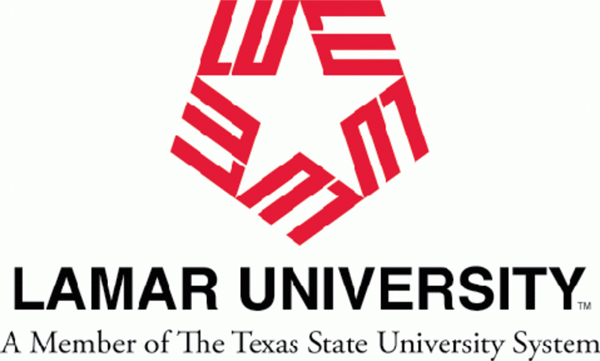


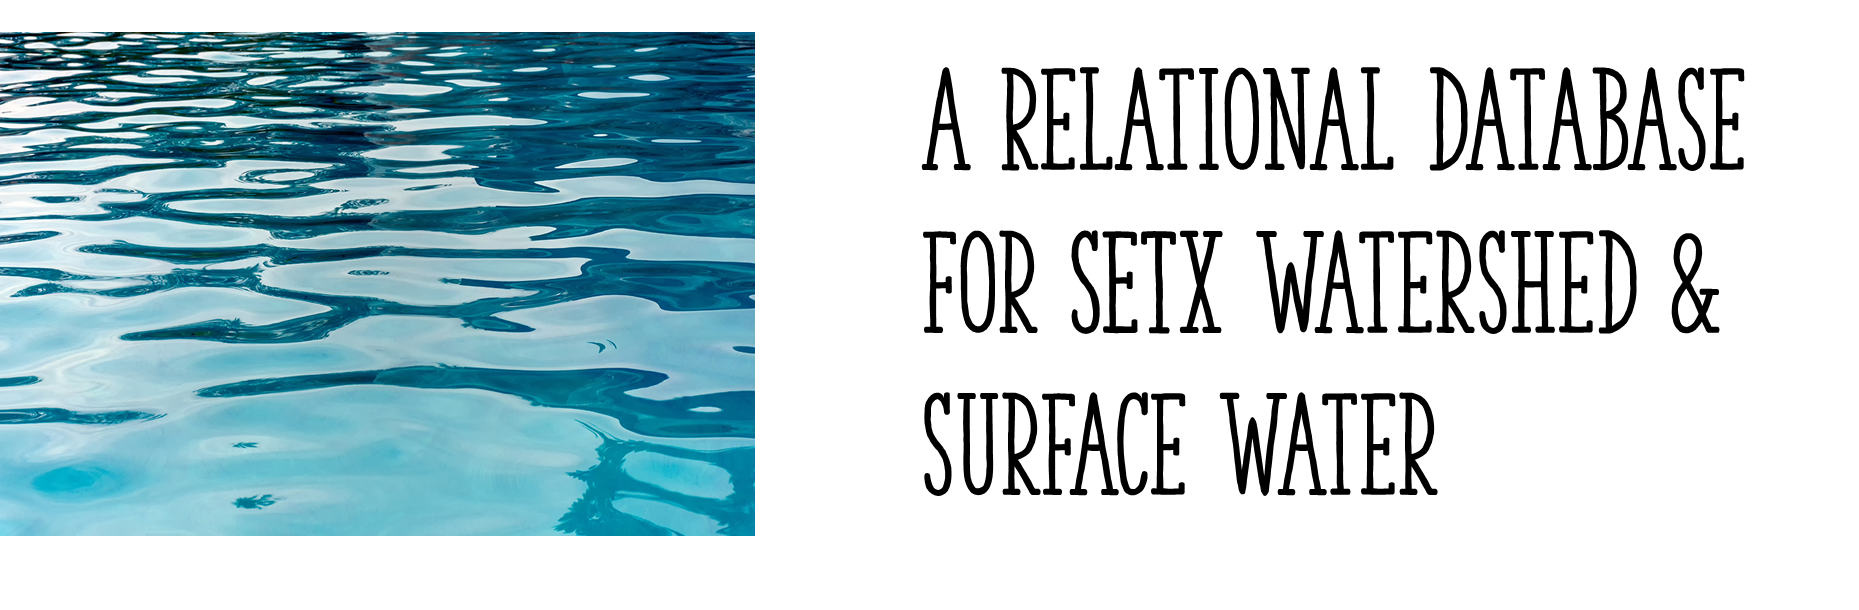


<table border="1" align="center">
	<tr style="background-color:#ADD8E6 ;">
		<td>
			<h1><font color='red'><center>Watershed and Surface water Resouces of SETX</center></font></h1>
		</td>
    </tr>
    <tr style="background-color:#ADD8E6 ;">
        <td>
		<h3><font color='blue'> <center> Vandan B Gadhiya </center> </font></h3>
        <h3><font color='blue'> <center> Saha Sontu </center> </font></h3>
        <h3><font color='blue'> <center> Ibironke Ademola </center> </font></h3>
		</td>
	</tr>    
    </table>

<h2><font color="red"> Load Libraries </font> </h2>

In [1]:
import sqlite3
import pandas as pd 
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt
import os #library for operating system functions
path = 'C:\projectcapstone' #path for woking directory
os.chdir(path) # change working directory
import warnings
warnings.filterwarnings("ignore")

<h2><font color="red">  Change working directory and read data from a coma separated value (csv) file </font> </h2> 

In [6]:
fname = 'Location_data_14counties1.csv' #Name of the csv file Location_data_14counties
a = pd.read_csv(fname)

In [7]:
fname2 = 'peakflow_clean.csv' #Name of the csv file peakflow
b = pd.read_csv(fname2)

In [8]:
fname3 = 'Daily_Streamflow_1972_1982_clean.csv' #Name of the csv file
s1 = pd.read_csv(fname3)

In [9]:
fname4 = 'Daily_Streamflow_1982_1992_clean.csv' #Name of the csv file
s2 = pd.read_csv(fname4)

In [10]:
fname5 = 'Daily_Streamflow_1992_2002_clean.csv' #Name of the csv file
s3 = pd.read_csv(fname5)

In [11]:
fname6 = 'Daily_Streamflow_2002_2012_clean.csv' #Name of the csv file
s4 = pd.read_csv(fname6)

In [12]:
fname7 = 'Daily_Streamflow_2012_2022_clean.csv' #Name of the csv file
s5 = pd.read_csv(fname7)

In [13]:
fname9 = 'huc_12_clean.csv'
h = pd.read_csv(fname9)

In [14]:
fname8 = 'peakflow_nonCounty_1922_2022_clean.csv' #Name of the csv file
b2 = pd.read_csv(fname8)

<h2><font color="red"> To delete tables </font> </h2>  

In [81]:
# to drop a table
dropTableStatement = "DROP TABLE Table name"
c.execute(dropTableStatement)

<h2><font color="red">Create Tables</font> </h2>

In [82]:
#Create table for Locations
c.execute("""CREATE TABLE Locations (
            s_n INTEGER  PRIMARY KEY AUTOINCREMENT NOT NULL,
            site_no INTEGER,
            site name TEXT,
            latitude NUMERIC,
            longitude NUMERIC,
            huc INTEGER,
            datum TEXT
            )""")

In [38]:
#Create table for peak streamflow surface water SETX Counties 
c.execute("""CREATE TABLE peak_streamflow (
            s_n INTEGER,
            site_no INTEGER,
            peak_dt TEXT,
            peak_tm TEXT,
            peak_va INTEGER,
            PRIMARY KEY (site_no, peak_dt)
            FOREIGN KEY(s_n) REFERENCES Site_Locations(s_n)
            )""")

In [39]:
#Create table for huc12 watershed
c.execute("""CREATE TABLE huc12 (
            fid TEXT PRIMARY KEY,
            huc12 INTEGER,
            name TEXT,
            shape_Leng NUMERIC,
            shape_Area NUMERIC,
            ObjectID INTEGER
            )""")


In [40]:
#Create table for peak streamflow surface water huc8,10,12 around SETX  
c.execute("""CREATE TABLE peakstreamflow_nonCounty_1922_2022 (
            site_no INTEGER,
            peak_dt TEXT,
            peak_tm TEXT,
            peak_va INTERGER,
            PRIMARY KEY (site_no, peak_dt)
            )""")

In [41]:
#Create table for surface water daily streamflow 1972-1982
c.execute("""CREATE TABLE d_streamflow1972_1982 (
            site_no INTEGER,
            datetime TEXT,
            Avg_Discharge INTEGER,
            PRIMARY KEY (site_no, datetime)
            )""")

In [42]:
#Create table for surface water daily streamflow 1982-1992
c.execute("""CREATE TABLE d_streamflow1982_1992 (
            site_no INTEGER,
            datetime TEXT,
            Avg_Discharge INTEGER,
            PRIMARY KEY (site_no, datetime)
            )""")

In [43]:
#Create table for surface water daily streamflow 1992-2002
c.execute("""CREATE TABLE d_streamflow1992_2002 (
            site_no INTEGER,
            datetime TEXT,
            Avg_Discharge INTEGER,
            PRIMARY KEY (site_no, datetime)
            )""")

In [44]:
#Create table for surface water daily streamflow 2002-2012
c.execute("""CREATE TABLE d_streamflow2002_2012 (
            site_no INTEGER,
            datetime TEXT,
            Avg_Discharge INTEGER,
            PRIMARY KEY (site_no, datetime)
            )""")

In [45]:
#Create table for surface water daily streamflow 2012-2022
c.execute("""CREATE TABLE d_streamflow2012_2022 (
            site_no INTEGER,
            datetime TEXT,
            Avg_Discharge INTEGER,
            PRIMARY KEY (site_no, datetime)
            )""")

In [46]:
#Create table for metadata
c.execute("""CREATE TABLE Metadata (
            Category TEXT,
            Name TEXT,
            Download Date TEXT,
            County TEXT,
            Description TEXT,
            Source TEXT,
            Remark TEXT,
            Storage Location
            )""")

In [48]:
conn.commit()# To save the changes made to the tables

<h2><font color="red">Insert values into tables in database "projectcapstone"</font> </h2> 

In [65]:
#Insert values into Table "peak_streamflow"      
with open(fname2) as peak_streamflow:
     no_records = 0
     for row in peak_streamflow:
         c.execute("INSERT INTO peak_streamflow VALUES (?,?,?,?,?)", row.split(","))
         conn.commit()
         no_records +=1
print('\n{} peak_streamflow Records Transferred'.format(no_records))


4959 peak_streamflow Records Transferred


In [66]:
#Insert values into Table "huc12"             
with open(fname9) as huc12:
       no_records = 0
       for row in huc12:
           c.execute("INSERT INTO huc12 VALUES (?,?,?,?,?,?)", row.split(","))
           conn.commit()
           no_records +=1
print('\n{} huc12 Records Transferred'.format(no_records))


194 huc12 Records Transferred


<h2><font color="red">Query database and print results</font> </h2>   

In [68]:
#Perform a query 
c.execute("SELECT * FROM peak_streamflow") #Query in relational databse 
results = c.fetchall()
print(results) 

[('s_n', 'site_no', 'peak_dt', 'peak_tm', 'peak_va\n'), (100, 8025307, '10/28/1974', '', 1010), (101, 8025307, '5/31/1976', '', 1250), (102, 8025307, '3/3/1977', '', 570), (103, 8025307, '11/29/1977', '', 605), (104, 8025307, '9/20/1979', '', 839), (105, 8025360, '1/6/1972', '', 15400), (106, 8025360, '5/9/1973', '', 37300), (107, 8025360, '1/28/1974', '', 67000), (108, 8025360, '5/9/1975', '', 39300), (109, 8025360, '6/3/1976', '', 19900), (110, 8025360, '2/17/1977', '', 10700), (111, 8025360, '3/28/1978', '', 9140), (112, 8025360, '3/5/1979', '', 28900), (113, 8025360, '5/19/1980', '', 35400), (114, 8025360, '5/27/1981', '', 8160), (115, 8025360, '4/22/1982', '', 30400), (116, 8025360, '5/22/1983', '', 39000), (117, 8025360, '12/26/1983', '', 15400), (118, 8025360, '3/16/1985', '', 14600), (119, 8025360, '6/12/1986', '', 37200), (120, 8025360, '1/13/1987', '', 15500), (121, 8025360, '12/17/1987', '', 16200), (122, 8025360, '5/19/1989', '', 114000), (123, 8025360, '6/2/1990', '', 4470

In [69]:
#Perform a query
c.execute("SELECT * FROM huc12 where fid = 5 ") #Query in relational databse 
results = c.fetchall()
print(results)

[('5', 120402000000, 'Dickinson Bayou', 1.709792773, 0.090497842, 142)]


<h2><font color="red">Maps</font> </h2>

<h2><font color="red">Texas Counties</font> </h2>

<AxesSubplot:>

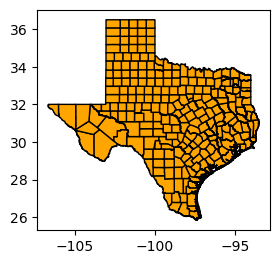

In [21]:
#Plot Texas map in terms of counties 
County_Texas = gpd.read_file("County.shp")
County_Texas.plot(figsize=(3,3),color ='orange',edgecolor='black')

<h2><font color="red">SETx Counties</font> </h2>

<AxesSubplot:>

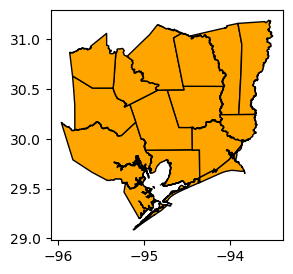

In [20]:
#Saperate the SETx Counties and Plot the map of SETx
Counties = []
Counties_southeast_texas_lst = ['Chambers','Galveston','Hardin','Harris','Jasper','Jefferson','Liberty','Montgomery','Newton','Orange','Polk','San Jacinto','Tyler','Walker']
for i in Counties_southeast_texas_lst:
    Counties_southeast_texas = County_Texas.loc[County_Texas['CNTY_NM'] == i]
    Counties.append(Counties_southeast_texas)

Counties_set = pd.concat(Counties)
Counties_set.plot(figsize = (3,3),color = 'orange',edgecolor='black')

<h2><font color="red">HUC8 Map</font> </h2>

<AxesSubplot:>

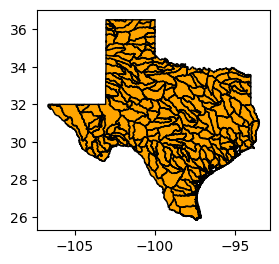

In [19]:
#Plot map of HUC8 from shapefile 
HUC8 = gpd.read_file('USGS_HUC_8_Subbasin.shp')
HUC8.plot(figsize = (3,3),color = 'orange',edgecolor='black')

<h2><font color="red">Convert both map into same crs</font> </h2>

In [10]:
HUC8.crs #Checking the crs of HUC8 map

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
Counties_set.crs #Checking the crs of SETx Counties map

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
#Convert crs using to_crs function
Counties_set = Counties_set.to_crs(epsg=4269)
HUC8 = HUC8.to_crs(epsg=4269)

In [15]:
HUC8.crs #EPSG:4269

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
Counties_set.crs ##EPSG:4269

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<h2><font color="red">CLIP SETx and HUC8 map</font></h2>

<AxesSubplot:>

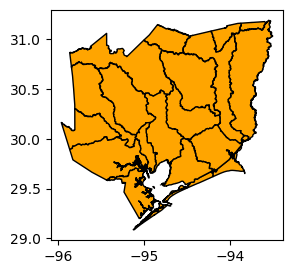

In [18]:
#Plot HUC8 into SETx Counties by using CLIP function
m1=gpd.clip(HUC8,Counties_set)
m1.plot(figsize = (3,3),color='orange',edgecolor = 'black')

<h2><font color="red">Site Location map</font></h2>

In [24]:
#Convert latitude and longitude into geometry point 
from shapely.geometry import Point  
site_location=pd.read_csv('Station_Location_14counties.csv')
geo=[Point(xy) for xy in zip(site_location['dec_long_va'], site_location['dec_lat_va'])]
site_location_p = gpd.GeoDataFrame(site_location, crs=4269, geometry=geo)

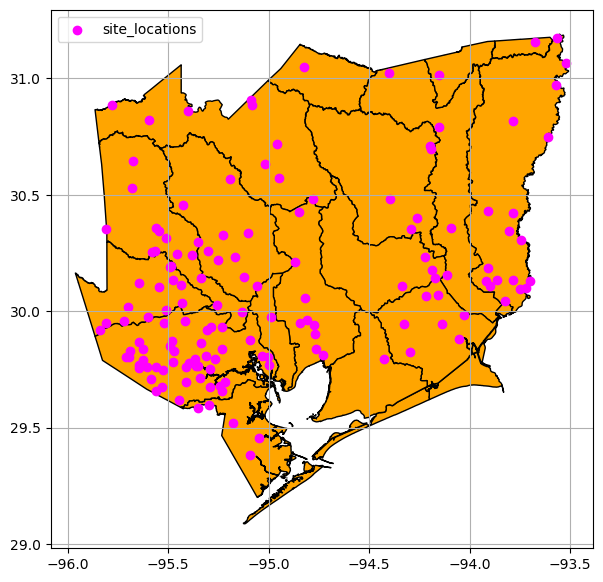

In [27]:
#Plot the site location over the HUC8 region of SETx counties
fig,ax = plt.subplots(figsize=(7,7))
m1.plot(ax=ax,color='orange',edgecolor='black')
site_location_p.plot(ax=ax,color='magenta',label='site_locations')
plt.grid()
plt.legend()

<h2><font color="red">Future Scope</font></h2>